# Redes Neurais Recorrentes (RNN)

## Redes Neurais Tradicionais (Feedforward)

* Redes densas e convolucionais (convnets) **não possuem memória**.
* Cada entrada é tratada de forma **independente**.
* Para processar sequências (como séries temporais), é preciso transformar tudo em um único vetor.
* Exemplo: ao usar dados de 5 dias, eles são "achatados" em um único vetor de entrada.

## RNN

* RNN significa **Rede Neural Recorrente**.
* Diferente das redes normais, a RNN **mantém um estado interno** que guarda informações do que já foi processado.
* Esse estado é atualizado a cada novo elemento da sequência.
* Assim como nosso cérebro, ela processa dados **de forma incremental**, lembrando do que veio antes.

## Como Funciona?

* A RNN processa os dados em **um laço (loop)**, passando de item em item da sequência.
* A cada passo, ela usa a entrada atual **e o estado anterior** para calcular a saída atual.
* Esse processo continua até o fim da sequência.
* O estado é **resetado** ao iniciar uma nova sequência (novo exemplo).

## O Que a RNN Faz com os Dados?

* Para cada elemento da sequência:

  * Combina a entrada atual com o estado anterior.
  * Aplica uma função de ativação (como `tanh`) para gerar a nova saída.
  * Atualiza o estado com essa nova saída.

## RNN no Keras

* A camada `SimpleRNN` faz isso automaticamente.
* Aceita dados em formato `(batch_size, timesteps, input_features)`.
* Pode retornar:

  * **A última saída** (padrão).
  * **Toda a sequência de saídas**, usando `return_sequences=True`.

## Empilhamento de RNNs

* É possível usar várias camadas RNN em sequência para aumentar a capacidade da rede.
* Quando fizer isso, todas as camadas intermediárias devem retornar a sequência completa.

## Limitações da SimpleRNN

* **Problema do gradiente que desaparece**: quanto mais longa a sequência, mais difícil é para a SimpleRNN aprender dependências de longo prazo.
* Resultado: a SimpleRNN geralmente **não é suficiente** para tarefas complexas.

## Soluções: LSTM e GRU

* Foram criadas para resolver o problema do gradiente.
* **LSTM (Long Short-Term Memory)**: criada em 1997, consegue **transportar informações por muitos passos no tempo**, como se fosse uma "esteira" paralela à sequência.
* **GRU (Gated Recurrent Unit)**: variação mais simples do LSTM, mas também muito eficaz.


In [ ]:
# pseudocodigo de uma RNN

state = 0
for input in sequence
    output = f(input, state)
    state = output

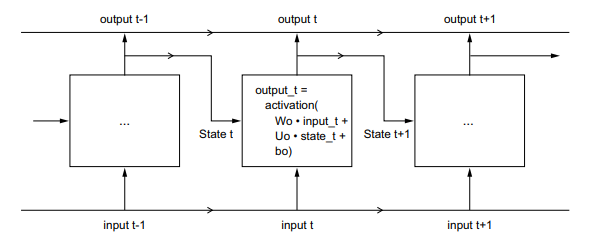

## Por que usar *Dropout* em RNNs?

O modelo LSTM pode demonstrar overfitting precoce, mesmo com poucas unidades. Para combater isso, usamos *dropout*, que inibe correlações fortuitas nos dados ao zerar aleatoriamente algumas entradas durante o treinamento.

> Aplicar dropout de forma ingênua em RNNs (por exemplo, entre as camadas ou variando a máscara a cada passo de tempo) pode atrapalhar o aprendizado.

### Dropout Recomendado para RNNs

Yarin Gal (2016) propôs:

* Aplicar **a mesma máscara de dropout a cada timestep**.
* Usar **dropout recorrente** nas ativações internas da RNN.

Essas estratégias ajudam o modelo a propagar corretamente o erro ao longo do tempo.

## Performance de RNNs

### CPU vs GPU

* **RNNs pequenas**: mais rápidas na CPU (multiplicações pequenas e pouco paralelizáveis).
* **RNNs grandes**: se beneficiam da GPU, mas cuidado com limitações do cuDNN.


## Empilhamento de Camadas Recorrentes

Se não há overfitting, mas a performance estagna, é hora de **aumentar a capacidade da rede**:

* Mais unidades por camada
* Mais camadas empilhadas

## RNNs Bidirecionais

RNNs são sensíveis à ordem. Uma RNN bidirecional processa a sequência **nas duas direções**:

* Cronológica
* Anticronológica

Combina as representações de ambas direções para capturar padrões mais amplos.

> Muito útil em NLP e também aplicável a séries temporais.
